# Goals


### In the previous tutorial you studied the role of freezing models on a small dataset. 


### Understand the role of freezing models in transfer learning on a fairly large dataset


### Why freeze/unfreeze base models in transfer learning


### Use comparison feature to appropriately set this parameter on custom dataset


### You will be using lego bricks dataset to train the classifiers

# What is freezing base network


    - To recap you have two parts in your network
        - One that already existed, the pretrained one, the base network
        - The new sub-network or a single layer you added


    -The hyper-parameter we can see here: Freeze base network
        - Freezing base network makes the base network untrainable
        - The base network now acts as a feature extractor and only the next half is trained
        - If you do not freeze the base network the entire network is trained

# Table of Contents


## [0. Install](#0)


## [1. Freeze Base network in resnet50 and train a classifier](#1)


## [2. Unfreeze base network in resnet50 and train another classifier](#2)


## [3. Compare both the experiment](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [3]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1922 (delta 8), reused 16 (delta 7), pack-reused 1905
Receiving objects: 100% (1922/1922), 69.95 MiB | 15.27 MiB/s, done.
Resolving deltas: 100% (1028/1028), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - LEGO Classification
    - https://www.kaggle.com/joosthazelzet/lego-brick-images/

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MRC58-oCdR1agFTWreDFqevjEOIWDnYZ" -O skin_cancer_mnist_dataset.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq skin_cancer_mnist_dataset.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using keras backend 
from keras_prototype import prototype

<a id='1'></a>
# Freeze Base network in densenet121 and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Freeze_Base_Network");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: Freeze_Base_Network
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/2_freezing_base_network/workspace/Project/Freeze_Base_Network/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----Freeze_Base_Network
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)     

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [4]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet50", 
            
            
            
            
            freeze_base_network=True, # Set this param as true
            
            
            
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Found 7011 validated image filenames belonging to 7 classes.
Found 3004 validated image filenames belonging to 7 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 7011
    Num val images:   3004
    Num classes:      7

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained m

## From the summary above

    - Model Params
        Model name:           resnet50
        Use Gpu:              True
        Use pretrained:       True
        
        
        Freeze base network:  True

## Another thing to notice from summary

    Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num of potentially trainable layers:  181
        Num of actual trainable layers:       6
        

### There are a total of 181 layers

### Since we have freezed base network only 6 are trainable, the final layers

## Train the classifier

In [6]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
1752/1752 [==============================] - 303s 173ms/step - loss: 1.0302 - acc: 0.6708 - val_loss: 1.4604 - val_acc: 0.6684

Epoch 00001: saving model to workspace/Project/Freeze_Base_Network/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 1.46041, saving model to workspace/Project/Freeze_Base_Network/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project/Freeze_Base_Network/output/models/intermediate_model_01.h5
Epoch 2/5
1752/1752 [==============================] - 169s 97ms/step - loss: 0.8990 - acc: 0.6935 - val_loss: 1.5523 - val_acc: 0.6691

Epoch 00002: saving model to workspace/Project/Freeze_Base_Network/output/models/resume_state.h5

Epoch 00002: val_loss did not improve from 1.46041

Epoch 00002: saving model to workspace/Project/Freeze_Base_Network/output/models/intermediate_model_02.h5

Epoch 00002: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 3/5
1752/1752 [=============

<Figure size 432x288 with 0 Axes>

### Best validation Accuracy achieved - 66.91 %
(You may get a different result)

<a id='2'></a>
# Unfreeze Base network in resnet50 and train a classifier

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [ ]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Unfreeze_Base_Network");

### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                    |
                    |
                    |-----Freeze_Base_Network (Previously created)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)
                     |
                     |
                     |-----Unfreeze_Base_Network (Created Now)
                                |
                                |-----experiment-state.json
                                |
                                |-----output
                                        |
                                        |------logs (All training logs and graphs saved here)
                                        |
                                        |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [4]:
gtf.Default(dataset_path="skin_cancer_mnist_dataset/images",
            path_to_csv="skin_cancer_mnist_dataset/train_labels.csv",
            model_name="resnet50",
            
            
            
            freeze_base_network=False,   # Set this param as false
            
            
            
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     skin_cancer_mnist_dataset/images
    Val path:       None
    CSV train path: skin_cancer_mnist_dataset/train_labels.csv
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7
    Delimiter:   ,

Found 7011 validated image filenames belonging to 7 classes.
Found 3004 validated image filenames belonging to 7 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 7011
    Num val images:   3004
    Num classes:      7

Model Params
    Model name:           resnet50
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained 

## From the summary above

    - Model Params
        Model name:           resnet50
        Use Gpu:              True
        Use pretrained:       True
        
        
        Freeze base network:  False

## Another thing to notice from summary

    Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50
        Num of potentially trainable layers:  181
        Num of actual trainable layers:       181
        

### There are a total of 181 layers

### Since we have unfreezed base network around 181 layers are trainable including the final layer

## Train the classifier

In [5]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
1752/1752 [==============================] - 388s 221ms/step - loss: 0.9475 - acc: 0.6846 - val_loss: 0.8013 - val_acc: 0.7184

Epoch 00001: saving model to workspace/Project/Unfreeze_Base_Network/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.80130, saving model to workspace/Project/Unfreeze_Base_Network/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project/Unfreeze_Base_Network/output/models/intermediate_model_01.h5
Epoch 2/5
1752/1752 [==============================] - 226s 129ms/step - loss: 0.7442 - acc: 0.7380 - val_loss: 0.6892 - val_acc: 0.7686

Epoch 00002: saving model to workspace/Project/Unfreeze_Base_Network/output/models/resume_state.h5

Epoch 00002: val_loss improved from 0.80130 to 0.68922, saving model to workspace/Project/Unfreeze_Base_Network/output/models/best_model.h5

Epoch 00002: saving model to workspace/Project/Unfreeze_Base_Network/output/models/intermediate_model_02.h5
Epoch 3/5
1752/

<Figure size 432x288 with 0 Axes>

### Best Val Accuracy achieved - 79.42 %
(You may get a different result)

<a id='3'></a>
# Compare both the experiment

In [6]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [7]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-freezing");

Comparison: - Compare-effect-of-freezing


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-freezing
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [8]:
gtf.Add_Experiment("Project", "Freeze_Base_Network");
gtf.Add_Experiment("Project", "Unfreeze_Base_Network");

Project - Project, Experiment - Freeze_Base_Network added
Project - Project, Experiment - Unfreeze_Base_Network added


### Run Analysis

In [9]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

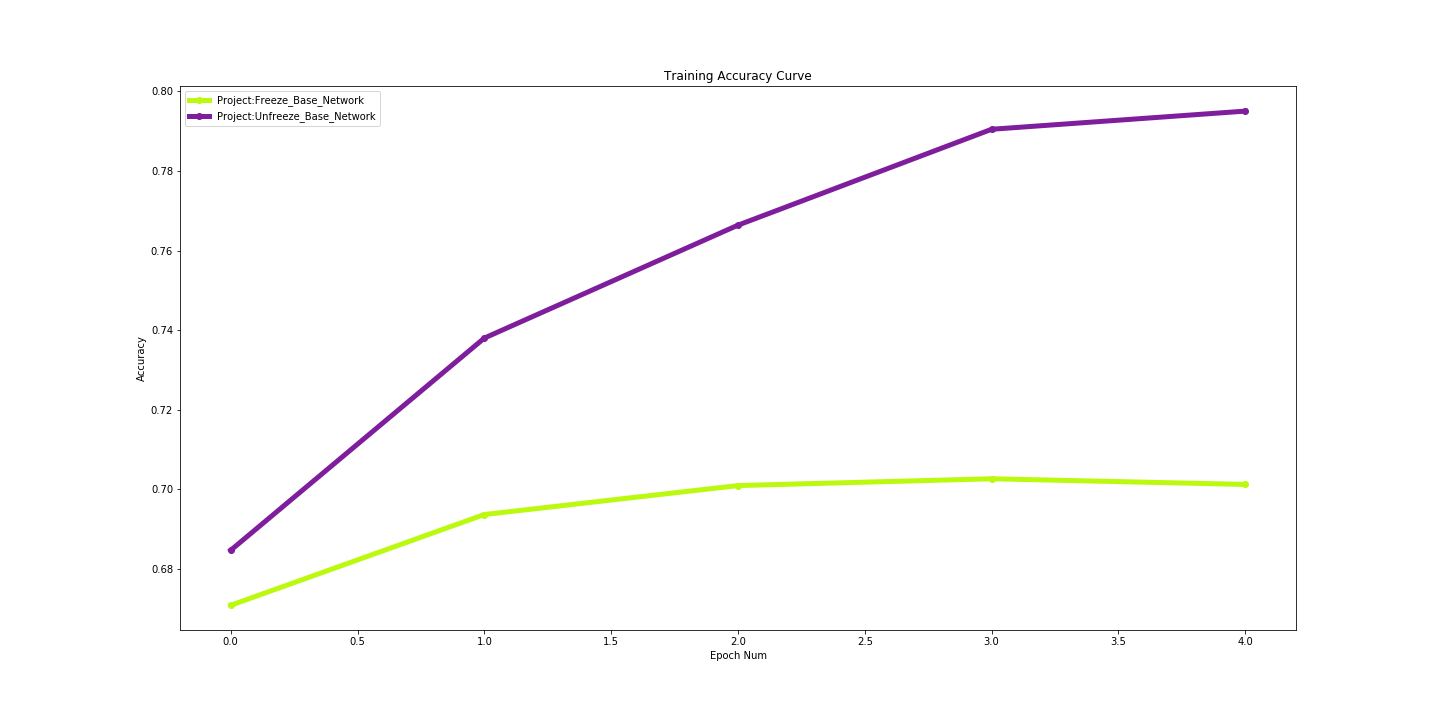

In [10]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/train_accuracy.png") 

### Training Loss Curves

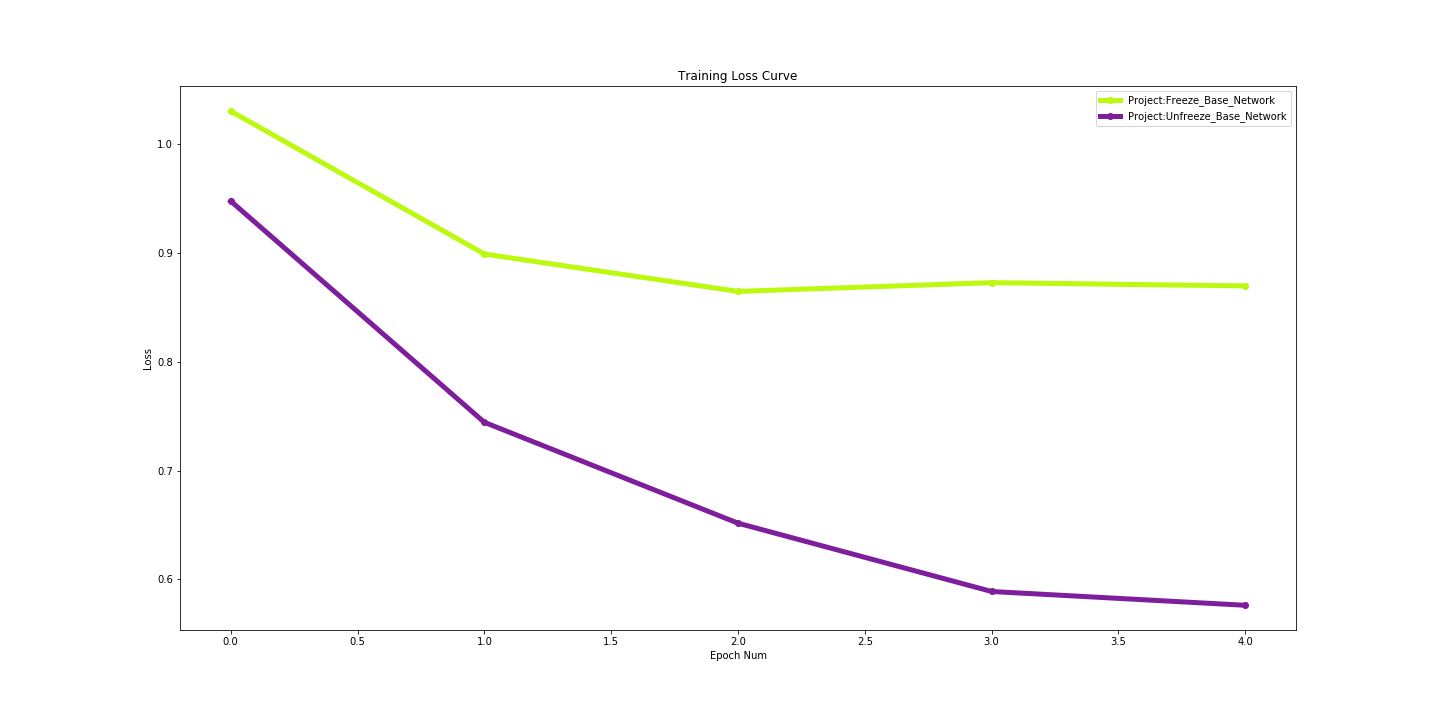

In [11]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/train_loss.png") 

### Validation Accuracy Curves

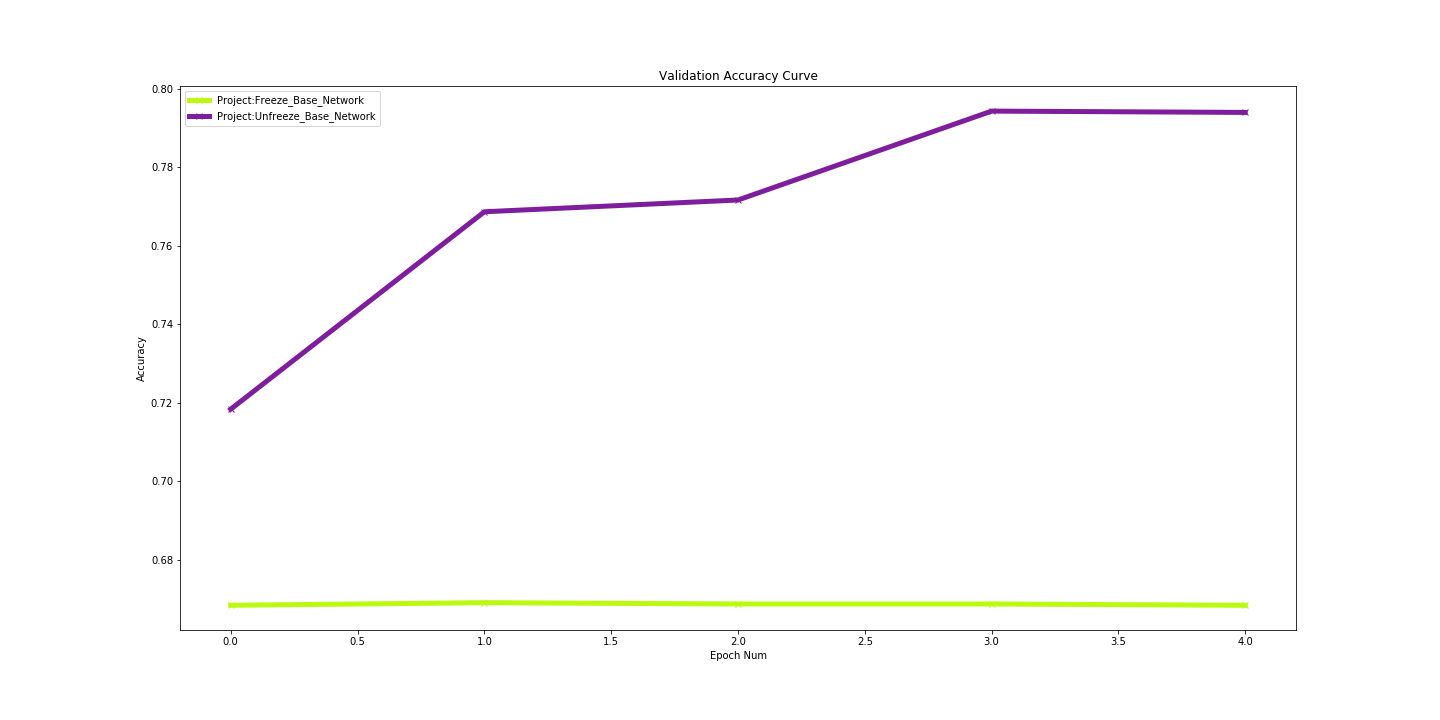

In [12]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/val_accuracy.png") 

### Validation loss curves

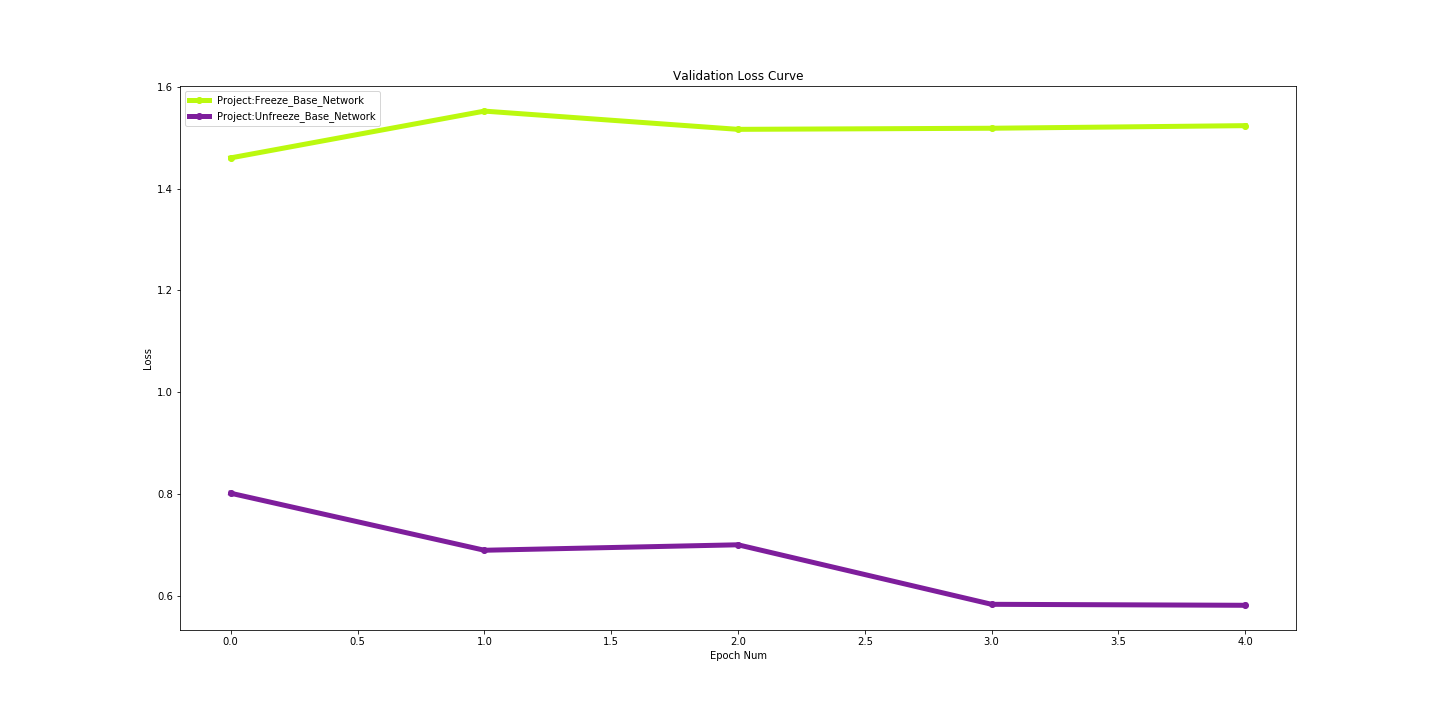

In [13]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-freezing/val_loss.png") 

## Accuracies achieved on validation dataset

### With freezing base network - 66.91 %
### Without freezing base network - 79.42 %

#### For this classifier, keeping the base network trainable seems to be a good option. Thus for other data it may result in overfitting the training data

(You may get a different result)